# Extract IOC from MITRE Knowledge Base

In [1]:
import os
import sys

sys.path.append(os.path.abspath("../.."))

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from libs import ioc

In [2]:
mitre_kb_path = "../../data/mitre/aggregated.csv"
report_sent_path = "../../data/all_sent.csv"

num_workers = 64
print(f"No. of workers: {num_workers}")

No. of workers: 64


## Load MITRE KB

In [3]:
dataset = pd.read_csv(mitre_kb_path)
dataset.head()

,tech_id,tech_name,text,section
0,T1564.002,Hidden Users,Adversaries may use hidden users to hide the p...,Description
1,T1564.002,Hidden Users,Dragonfly has modified the Registry to hide c...,Procedure Examples
2,T1564.002,Hidden Users,Kimsuky has run reg add ‘HKLM\SOFTWARE\Micro...,Procedure Examples
3,T1564.002,Hidden Users,SMOKEDHAM has modified the Registry to hide c...,Procedure Examples
4,T1480,Execution Guardrails,Adversaries may use execution guardrails to co...,Description


In [4]:
dataset_records = dataset.to_dict(orient="records")

dataset_results = ioc.extract_iocs(dataset_records, num_workers=num_workers)
dataset_results_df = pd.DataFrame(dataset_results)

100%|██████████| 12006/12006 [00:29<00:00, 401.17it/s]


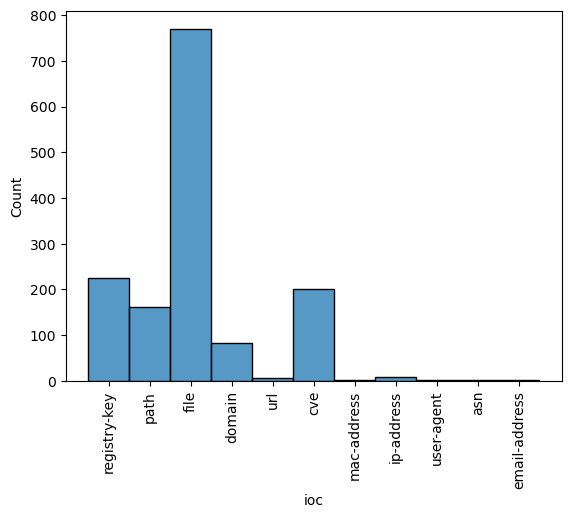

No. sentences with IOCs found: 1459 (12.15%)
No. IOCs found: 1459
No. report sentences: 12006


In [5]:
sns.histplot(data=dataset_results_df, x="ioc")
plt.xticks(rotation=90)
plt.show()

print(
    f"No. sentences with IOCs found: {len(dataset_results_df)} ({len(dataset_results_df) * 100/len(dataset):.2f}%)"
)
print("No. IOCs found:", len(dataset_results_df))
print("No. report sentences:", len(dataset))

In [6]:
dataset_results_df.to_csv(mitre_kb_path.replace('.csv', '.ioc.csv'), index=False)

In [7]:
# fail

## Load Report Sentences

In [8]:
report_sent = pd.read_csv(report_sent_path)

print(f"No. report sentences: {len(report_sent)}")
report_sent

No. report sentences: 3539


,tech_id,text,tech_name,top_tech_id,dataset
0,T1059.001,AAD Internals is a PowerShell module where I’v...,PowerShell,T1059,manual
1,T1059.001,Run and the AppleSeed payload executed through...,PowerShell,T1059,manual
2,T1059.001,The shellcode invokes PowerShell to issue a HT...,PowerShell,T1059,manual
3,T1059.001,"The following shows this unused command, which...",PowerShell,T1059,manual
4,T1059.001,Using the “reverse shell” method mentioned abo...,PowerShell,T1059,manual
...,...,...,...,...,...
3534,T1546.014,emond,Emond,T1546,tram
3535,T1218.002,CPL files,Control Panel,T1218,tram
3536,T1218.002,.cpl,Control Panel,T1218,tram
3537,T1546.011,application shim,Application Shimming,T1546,tram


In [9]:
report_records = report_sent.to_dict(orient="records")

report_results = ioc.extract_iocs(report_records, num_workers=num_workers)
report_results_df = pd.DataFrame(report_results)

100%|██████████| 3539/3539 [00:10<00:00, 323.88it/s]


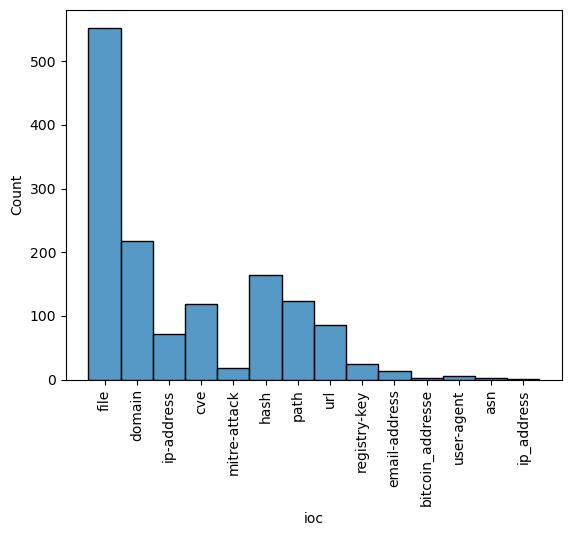

No. sentences with IOCs found: 1399 (39.53%)
No. IOCs found: 1399
No. report sentences: 3539


In [10]:
sns.histplot(data=report_results_df, x="ioc")
plt.xticks(rotation=90)
plt.show()

print(
    f"No. sentences with IOCs found: {len(report_results_df)} ({len(report_results_df) * 100/len(report_sent):.2f}%)"
)
print("No. IOCs found:", len(report_results_df))
print("No. report sentences:", len(report_sent))

In [11]:
report_results_df.to_csv(report_sent_path.replace(".csv", ".ioc.csv"), index=False)